---
# Cairo University Faculty of Engineering
## Machine Learning
## Assignment 6
---

Please write your full name here

- **Name** : "Andrew Mushen"
- **BN** : 15


# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [92]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans

In [93]:
X_moon, y_moon = make_moons(n_samples=250, noise=0.05, random_state=42)

# Questoin 1
Scatter plot the dataset

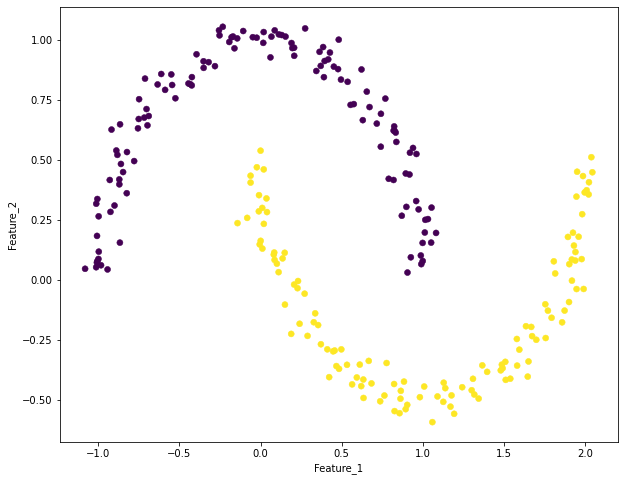

In [107]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib widget

plt.figure(figsize=(10,8))
#ax = Axes3D(fig)

feat_1 = X_moon[:, 0]
feat_2 = X_moon[:, 1]

plt.scatter(feat_1, feat_2, c=y_moon, cmap='viridis', linewidth=0.5)
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")

plt.show()


# Question 2
In your opinon, how well will K-Means perform on the above dataset? Explain.

## **the k-means methode will perform so well on the sides parts but will perfrom so bad with the overlabed part(in the middle)** 

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

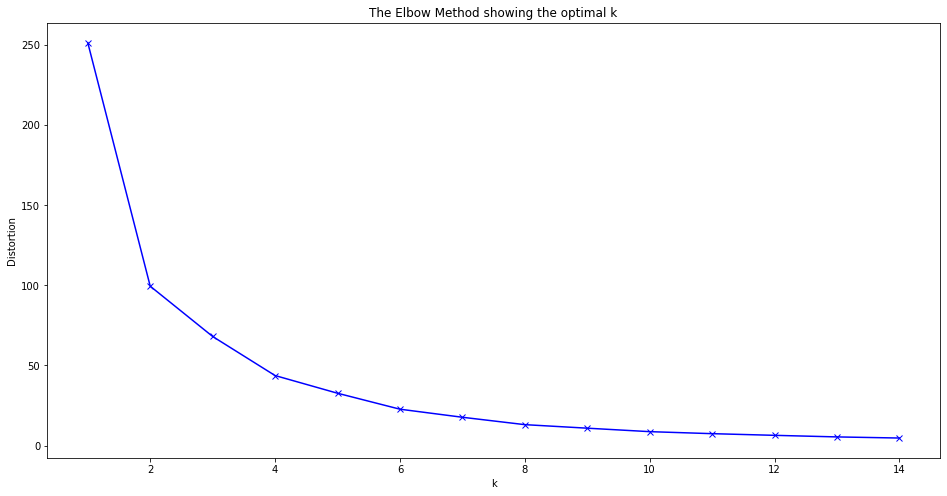

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
%matplotlib inline


Distortions = []
K = range(1,15)
for i in range(1, 15):
    model = KMeans(n_clusters=i)
    model.fit(X_moon, y_moon)
    Distortions.append(model.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, Distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Text(0.5, 1.0, 'K_Means')

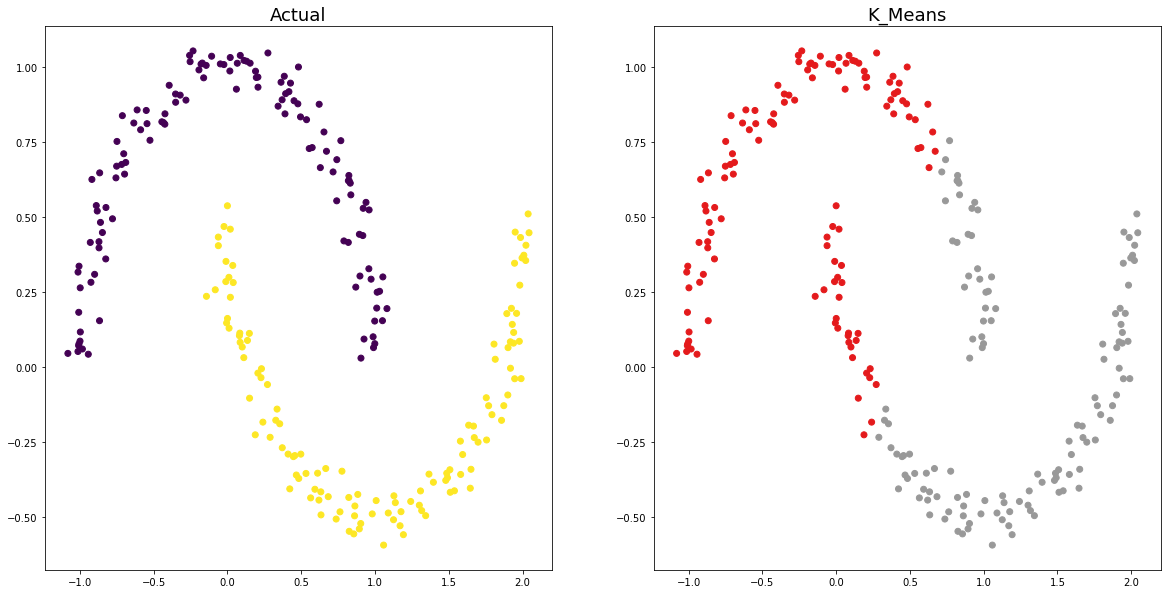

In [96]:
trained_model = KMeans(n_clusters=2)
trained_model.fit(X_moon, y_moon)

ypred=trained_model.predict(X_moon)
yact=y_moon
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].scatter(X_moon[:,0], X_moon[:,1], c=yact)
axes[1].scatter(X_moon[:,0], X_moon[:,1], c=ypred, cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

Amount of clusters: 2
Number of cells is  8
Threshold is 0
The noise  0


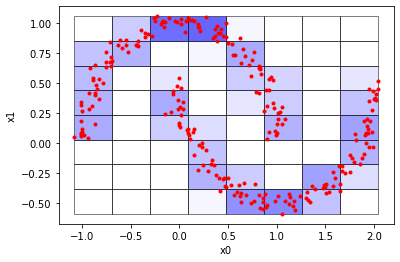

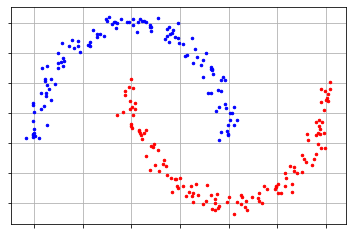

In [97]:
for i in range(4,10):
    for j in range(0,2): 
        intervals = i  # defines amount of cells in grid in each dimension
        threshold = j   # lets consider each point as non-outlier
        clique_instance = clique(X_moon, intervals, threshold)

        clique_instance.process()
        clusters = clique_instance.get_clusters()  # allocated clusters
        # points that are considered as outliers (in this example should be empty)
        noise = clique_instance.get_noise()
        cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid

        if len(noise) == 0 :
            if len(clusters) == 2 :
                print("Amount of clusters:", len(clusters))
                print("Number of cells is ", intervals)
                print("Threshold is", threshold)
                print("The noise ", len(noise))

                # visualize clustering results
                # show grid that has been formed by the algorithm
                clique_visualizer.show_grid(cells, X_moon)
                clique_visualizer.show_clusters(
                    X_moon, clusters, noise)  # show clustering results

## **it cluster the the maxmal set of dense unites in a subspace together, so it was able to cluster the data into to classes based on the maxmium connection of the dense unites, thus was able to perform so well on the overlaped part of the data**

### **when we divided the grid to 8x8 cells the clique was able to identify the 2 clusters correctly with 0** 

### **unlike kmeans which depends on centropids and will classify points based on distance, which will be so weak to work with such type of data**

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

Amount of clusters: 4
Number of cells is  15
Threshold is 6
The noise  211


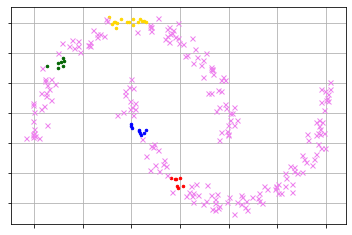

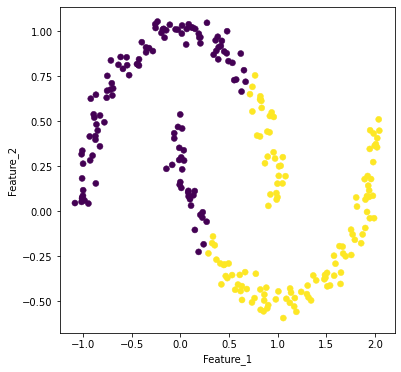

In [98]:
#trained K-means model
trained_model = KMeans(n_clusters=2)
trained_model.fit(X_moon, y_moon)
ypred = trained_model.predict(X_moon)

#clique clustring 
threshold = 6
intervals = 15
clique_instance = clique(X_moon, intervals, threshold)
clique_instance.process()
clusters = clique_instance.get_clusters()  
noise = clique_instance.get_noise()
print("Amount of clusters:", len(clusters))
print("Number of cells is ", intervals)
print("Threshold is", threshold)
print("The noise ", len(noise))
#clique_visualizer.show_grid(cells, X_moon)
clique_visualizer.show_clusters(X_moon, clusters, noise)


#plotting of Kmeans model
fig = plt.figure(figsize=(6, 6))
plt.scatter(feat_1, feat_2, c=ypred, cmap='viridis', linewidth=0.5)
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")

plt.show()


## **What is the number of clusters in case of clique? and why?**

### *the number of clusters is 4, at setting threshold to 6 most of the data were considred noise while 4 classes were formed in the middle of noise*


## **Why do kmeans fail to cluster such data?**

## *cause it contains overlaping data, which k means cant deal with*

In [99]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [100]:
def PCA(x, n_components=2):

    # calculated mean
    x_meaned = x - np.mean(x, axis=0)
    # calculated cov matrix
    cov_mat = np.cov(x_meaned, rowvar=False)

    # assume the matrix is symmetric fast algorithm
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
    # works for any matrix ie slower
    #eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

    # sorting eigen values and eigen vectors
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenValues = eigen_values[sorted_index]
    sorted_eigenVector = eigen_vectors[sorted_index]

    # using specfic subests of vectors
    eigen_vectors_subest = sorted_eigenVector[:, 0:n_components]

    # transform the data
    X_transformed = np.dot(eigen_vectors_subest.transpose(),
                           x_meaned.transpose()).transpose()

    return sorted_eigenVector, sorted_eigenValues, X_transformed


the sorted eigen vectors are  [[-0.94973109  0.31306686]
 [-0.31306686 -0.94973109]]
the sorted eigen values are  [0.82771138 0.18219174]


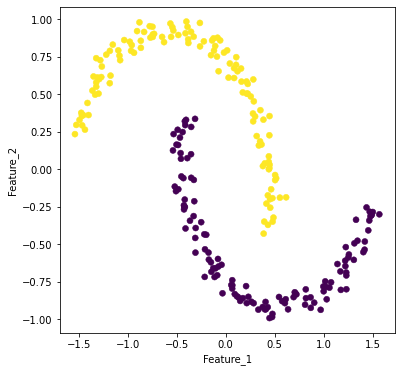

In [101]:
sorted_eigen_vectors, sorted_eigen_values, Transformed_data = PCA(X_moon)

print("the sorted eigen vectors are ", sorted_eigen_vectors)
print("the sorted eigen values are ", sorted_eigen_values)

fig = plt.figure(figsize=(6, 6))
plt.scatter(Transformed_data[:, 0], Transformed_data[:,
            1], c=y_moon, cmap='viridis', linewidth=0.5)
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")

plt.show()


# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [102]:
import numpy as np
from scipy.spatial.distance import cdist 
 
#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations=1000):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] 
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points, centroids 

Cluster 1 center is at  [-0.56044831  0.52408788]
Cluster 2 center is at  [ 0.57867428 -0.54113139]


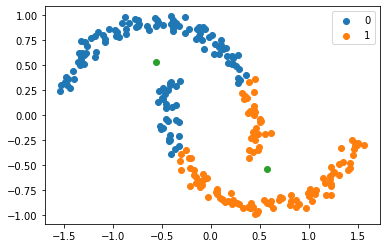

In [103]:
number_of_clusters = 2
_, _, Transformed_data = PCA(X_moon)
 
predict, centroids = kmeans(Transformed_data,number_of_clusters)

centriod_shape = centroids.shape
number_of_centriods = centriod_shape[1]

centers_x = []
centers_y = []
for i in range(0, number_of_centriods):
    print("Cluster {} center is at " .format(i+1), centroids[i])
    centers_x.append(centroids[i][0])
    centers_y.append(centroids[i][1])
 
#Visualize the results
 
u_labels = np.unique(predict)
for i in u_labels:
    plt.scatter(Transformed_data[predict == i , 0] , Transformed_data[predict == i , 1] , label = i)

plt.scatter(centers_x,centers_y , cmap=u_labels)
plt.legend()
plt.show()